## 1 - Importar  o banco de Daos 

In [1]:
# Importando bibliotecas
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Lendo o dataframe
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 2 - Renomear as Colunas

In [3]:
renomear_colunas = {
    'Age': 'Idade', 
    'Sex': 'Sexo', 
    'ChestPainType': 'Tipo de dor', 
    'RestingBP': 'Pressão',
    'Cholesterol': 'Colesterol', 
    'FastingBS': 'Glicemia', 
    'RestingECG': 'Eletro', 
    'MaxHR': 'BPM',
    'ExerciseAngina': 'Dor por exec.', 
    'ST_Slope': 'Inclinacao ST', 
    'HeartDisease': 'DCV'
}

df = df.rename(columns=renomear_colunas)
df

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,Oldpeak,Inclinacao ST,DCV
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 3 - Tratamneto de Dados 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Pressão,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Colesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
Glicemia,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
BPM,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
DCV,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [5]:
# Excluir as linhas que possuem o valor de colesterol igual a 0
df = df[df['Colesterol'] != 0]

# Excluir as linhas que possuem o valor de pressão arterial igual a 0
df = df[df['Pressão'] != 0]

#Exibe o dataframe sem as linhas das colunas: 'Colesterol e Pressão' igual a 0
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
Pressão,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Colesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
Glicemia,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
BPM,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2
DCV,746.0,0.477212,0.499816,0.0,0.00,0.0,1.0,1.0


## 3.1 - Preparação de Dados

In [6]:
df

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,Oldpeak,Inclinacao ST,DCV
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### Dados Nulos

In [7]:
#Verificando se existe e quantos dados nulos existem no dataframe
df.isnull().sum()

Idade            0
Sexo             0
Tipo de dor      0
Pressão          0
Colesterol       0
Glicemia         0
Eletro           0
BPM              0
Dor por exec.    0
Oldpeak          0
Inclinacao ST    0
DCV              0
dtype: int64

In [8]:
# Utiliza o T (transpose) para inverter colunas pelas linhas
df.isnull().T

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
Idade,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sexo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Tipo de dor,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Pressão,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Colesterol,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Glicemia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Eletro,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BPM,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dor por exec.,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Oldpeak,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# A função any() retorna apenas uma vez True ou False se em alguma coluna da linha específica tiver dado nulo.
df.isnull().T.any()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 746, dtype: bool

In [10]:
# Filtrar para que retorne apenas as linhas que possuem pelo menos 1 valor nulo.
df[df.isnull().T.any()]

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,Oldpeak,Inclinacao ST,DCV


### Não foram encontrados nenhum dados nulos!

In [11]:
df.isnull().sum()

Idade            0
Sexo             0
Tipo de dor      0
Pressão          0
Colesterol       0
Glicemia         0
Eletro           0
BPM              0
Dor por exec.    0
Oldpeak          0
Inclinacao ST    0
DCV              0
dtype: int64

## 5 - Análise de Dados com Plotly

In [132]:
# Função que constroe gráfico em barras
def constroi_grafico_barras(variavel):
    contagem = df[variavel].value_counts().reset_index()
    fig = px.bar(contagem, x=variavel, y='count', title ='Quantidade de por ' + variavel, text_auto=True )
    fig.show()

constroi_grafico_barras('Idade')
constroi_grafico_barras('Sexo')
constroi_grafico_barras('Tipo de dor')
constroi_grafico_barras('Pressão')
constroi_grafico_barras('Colesterol')
constroi_grafico_barras('Glicemia')
constroi_grafico_barras('Eletro')
constroi_grafico_barras('BPM')
constroi_grafico_barras('Dor por exec.')
constroi_grafico_barras('Oldpeak')
constroi_grafico_barras('Inclinacao ST')
constroi_grafico_barras('DCV')

In [92]:
# plot
# scatter
# bar
# pie

## 4 - Análise de Dados com Matplotlib

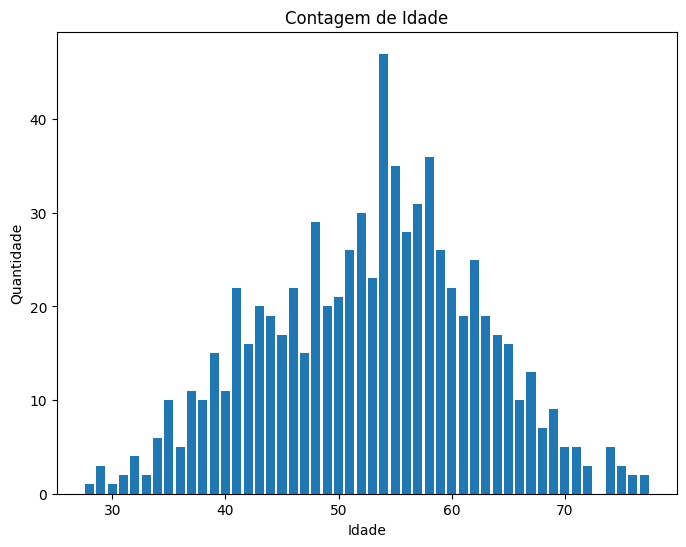

In [138]:
contagem_idade = df['Idade'].value_counts()

x = 
y = 
plt.figure(figsize=(8, 6))
# bars = plt.bar(contagem_idade.index, contagem_idade)
plt.plot(x,y)
plt.title('Contagem de Idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

# Adicionando os valores acima das barras
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

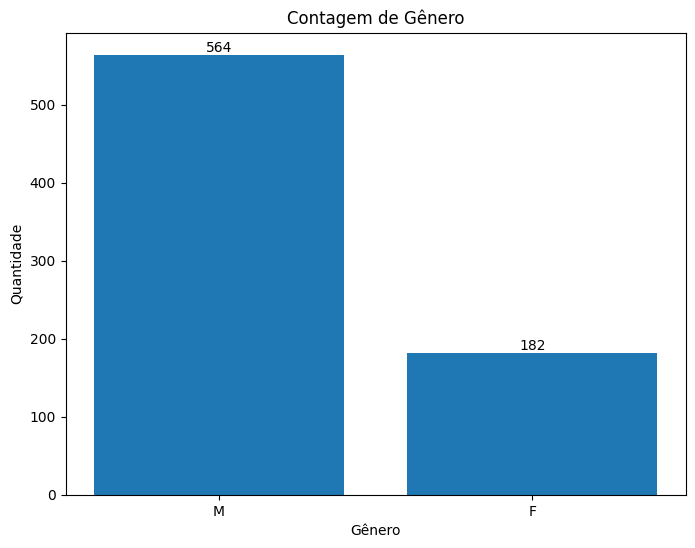

In [103]:
contagem_genero = df['Sexo'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_genero.index, contagem_genero)
plt.title('Contagem de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

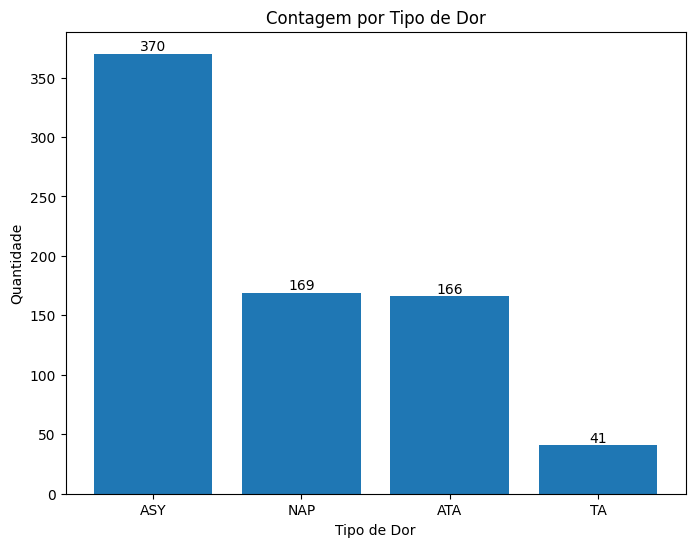

In [104]:
contagem_Tipo_de_dor = df['Tipo de dor'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_Tipo_de_dor.index, contagem_Tipo_de_dor)
plt.title('Contagem por Tipo de Dor')
plt.xlabel('Tipo de Dor')
plt.ylabel('Quantidade')

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

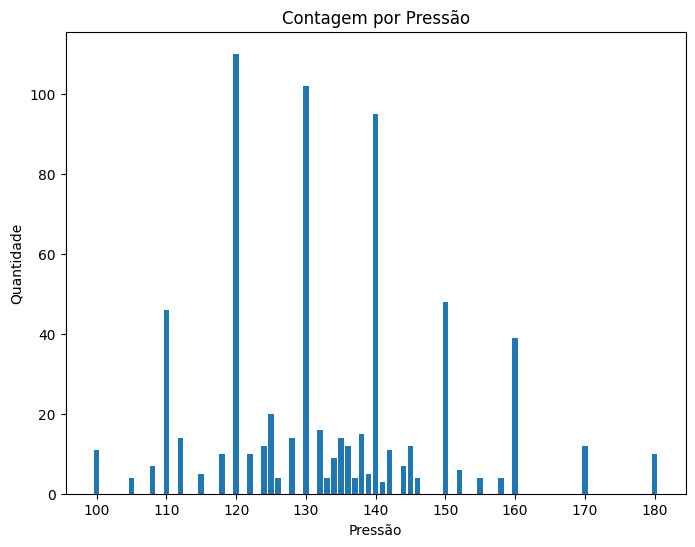

In [115]:
contagem_pressao = df['Pressão'].value_counts().head(35)

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_pressao.index, contagem_pressao)
plt.title('Contagem por Pressão')
plt.xlabel('Pressão')
plt.ylabel('Quantidade')
plt.show()

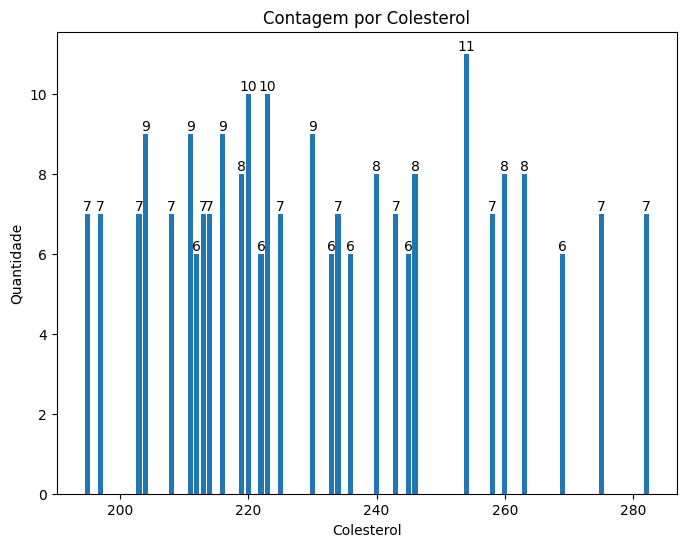

In [117]:
contagem_colesterol = df['Colesterol'].value_counts().head(30)

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_colesterol.index, contagem_colesterol)
plt.title('Contagem por Colesterol')
plt.xlabel('Colesterol')
plt.ylabel('Quantidade')

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

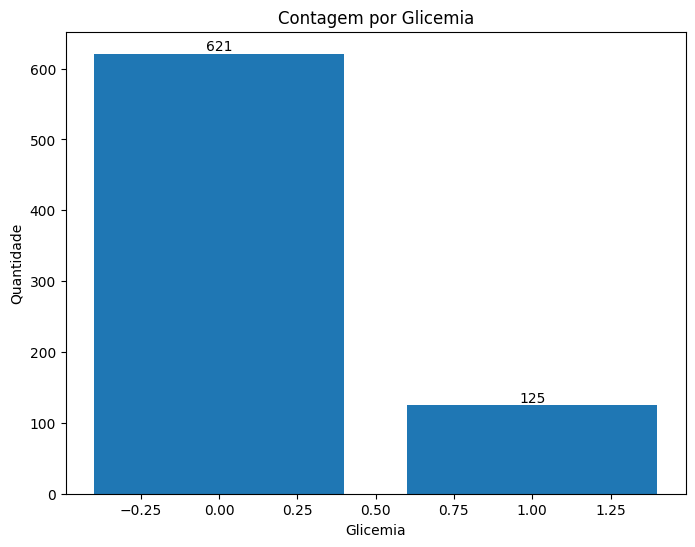

In [118]:
contagem_clicemia = df['Glicemia'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_clicemia.index, contagem_clicemia)
plt.title('Contagem por Glicemia')
plt.xlabel('Glicemia')
plt.ylabel('Quantidade')

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

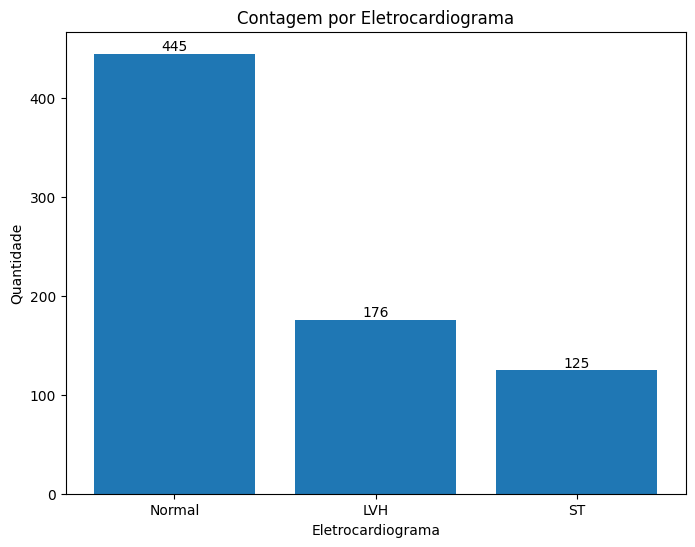

In [119]:
contagem_eletro = df['Eletro'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_eletro.index, contagem_eletro)
plt.title('Contagem por Eletrocardiograma')
plt.xlabel('Eletrocardiograma')
plt.ylabel('Quantidade')

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

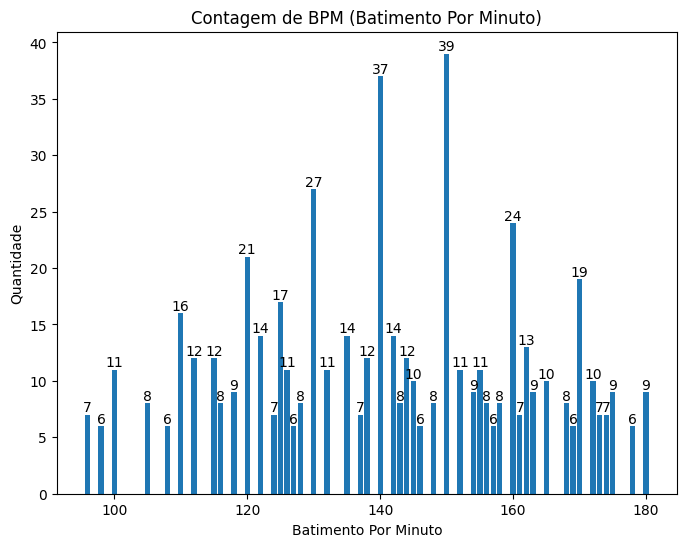

In [121]:
contagem_bpm = df['BPM'].value_counts().head(50)

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_bpm.index, contagem_bpm)
plt.title('Contagem de BPM (Batimento Por Minuto)')
plt.xlabel('Batimento Por Minuto')
plt.ylabel('Quantidade')

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

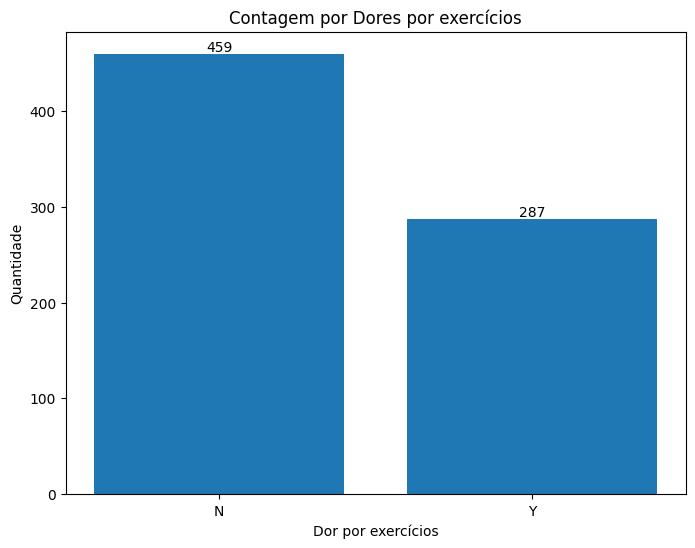

In [122]:
contagem_dor_por_exec = df['Dor por exec.'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_dor_por_exec.index, contagem_dor_por_exec)
plt.title('Contagem por Dores por exercícios')
plt.xlabel('Dor por exercícios')
plt.ylabel('Quantidade')

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

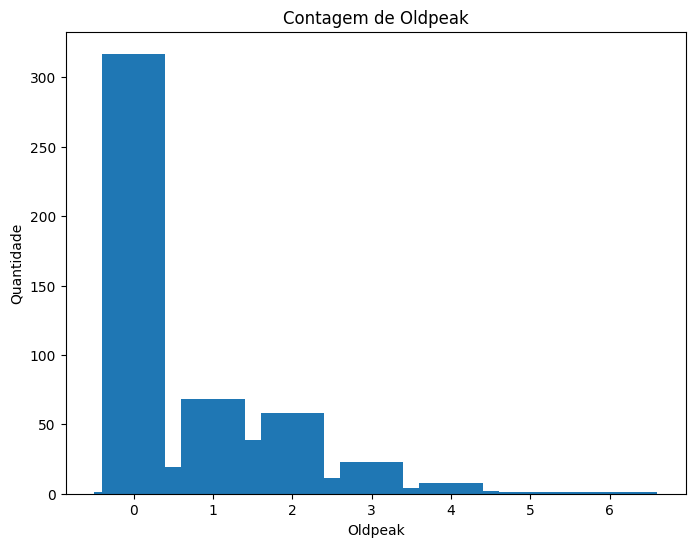

In [137]:
contagem_oldpeak = df['Oldpeak'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_oldpeak.index, contagem_oldpeak)
plt.title('Contagem de Oldpeak')
plt.xlabel('Oldpeak')
plt.ylabel('Quantidade')
plt.show()

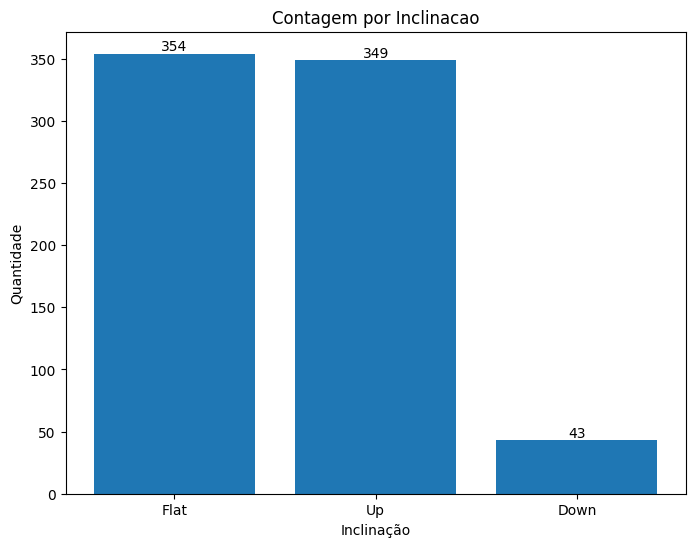

In [129]:
contagem_inclinacao = df['Inclinacao ST'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_inclinacao.index, contagem_inclinacao)
plt.title('Contagem por Inclinacao')
plt.xlabel('Inclinação')
plt.ylabel('Quantidade')

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

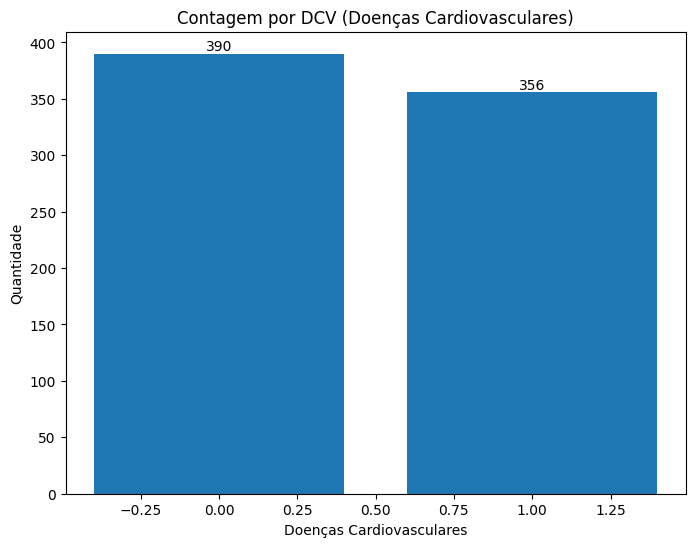

In [130]:
contagem_dcv = df['DCV'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(contagem_dcv.index, contagem_dcv)
plt.title('Contagem por DCV (Doenças Cardiovasculares)')
plt.xlabel('Doenças Cardiovasculares')
plt.ylabel('Quantidade')

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

plt.show()

## 5 - Exibição de Gráficos com Plotly

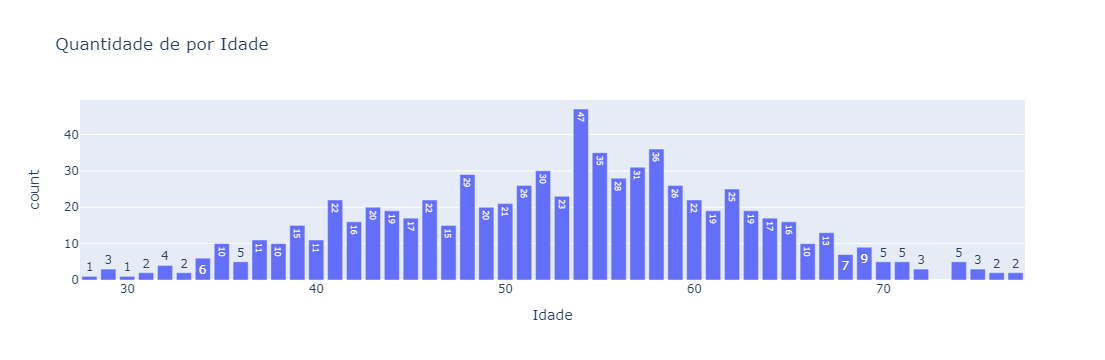

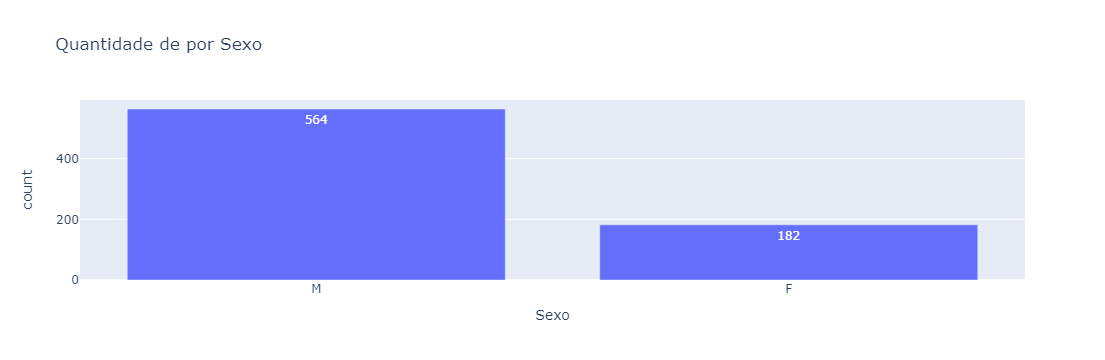

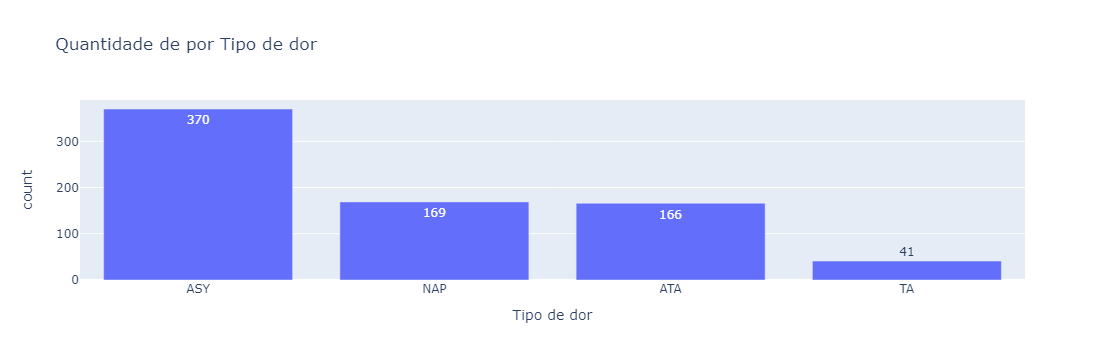

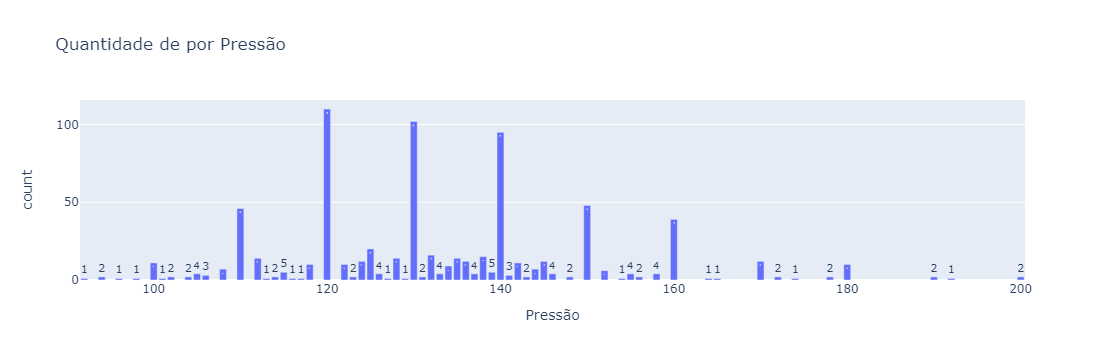

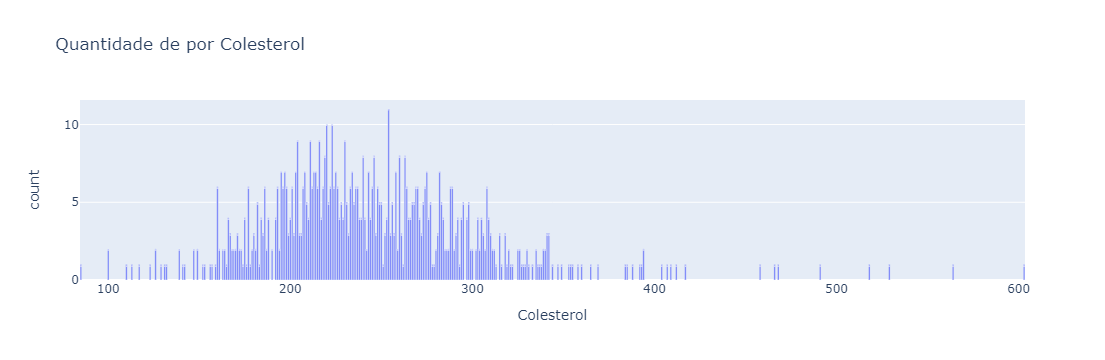

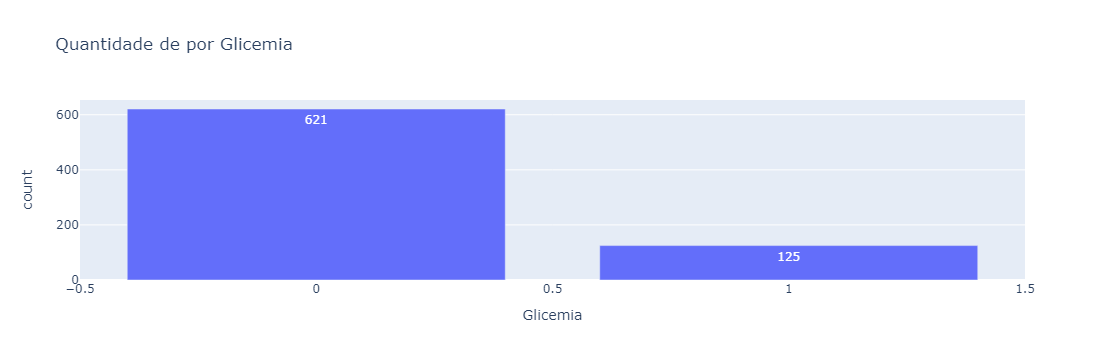

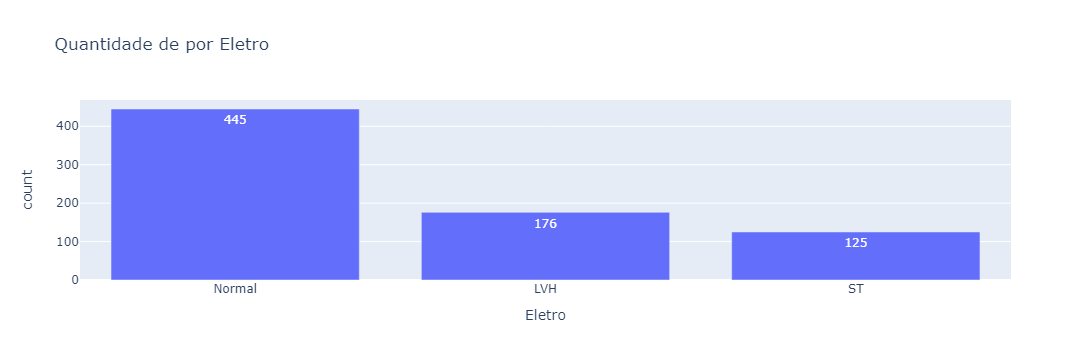

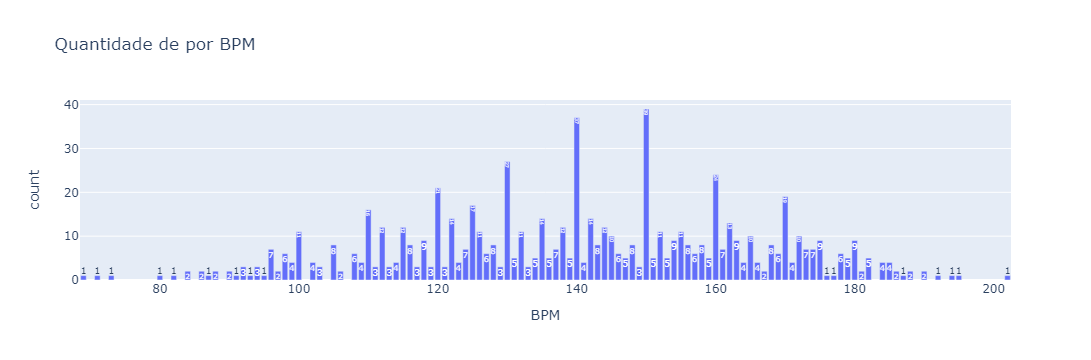

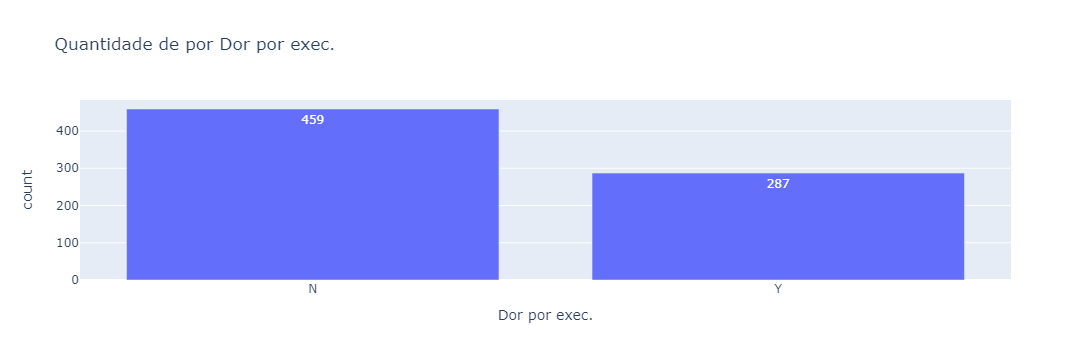

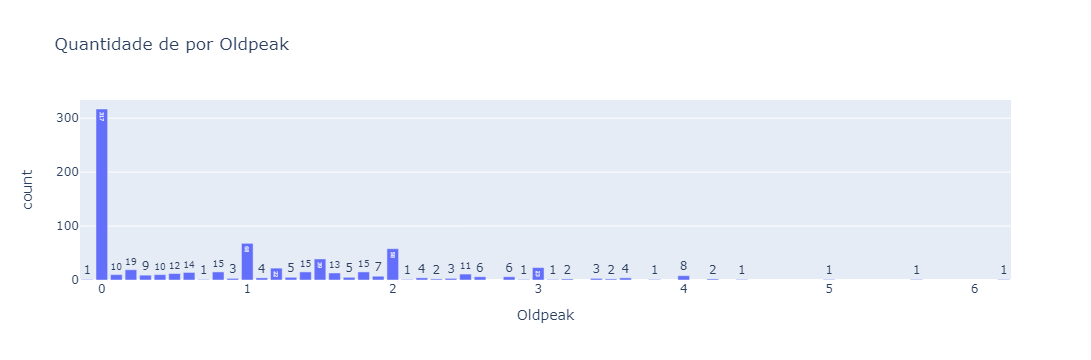

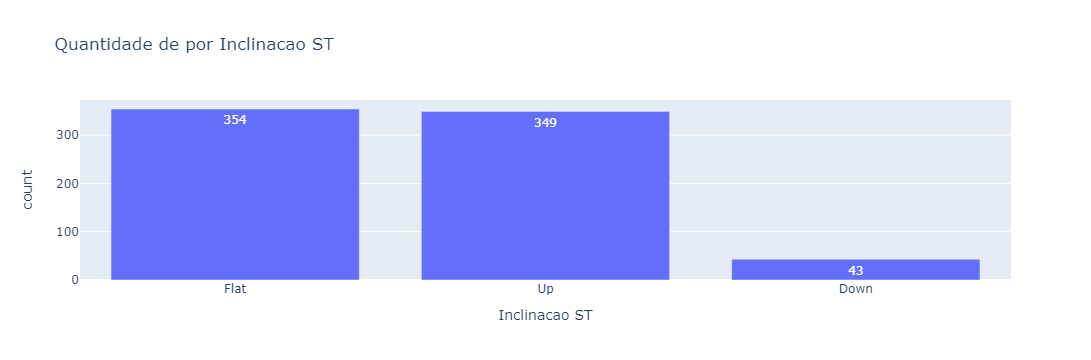

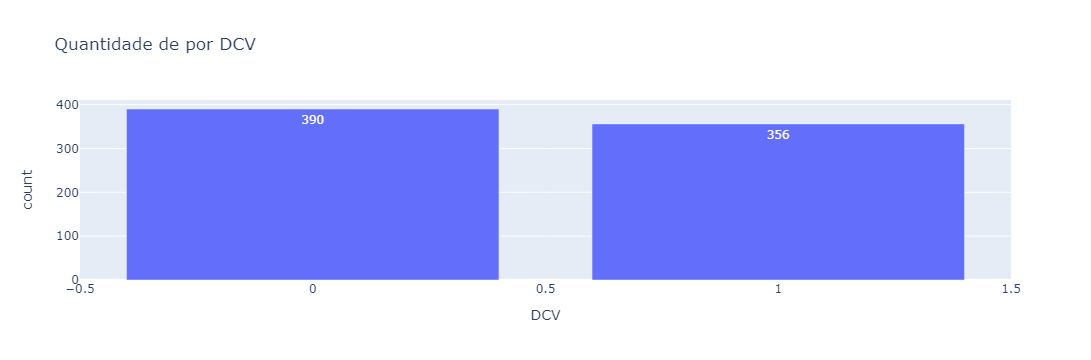

In [135]:
# Essa função será usada no streamlit

# Função que constroe gráfico em barras
def constroi_grafico_barras(variavel):
    contagem = df[variavel].value_counts().reset_index()
    fig = px.bar(contagem, x=variavel, y='count', title ='Quantidade de por ' + variavel, text_auto=True )
    fig.show()

constroi_grafico_barras('Idade')
constroi_grafico_barras('Sexo')
constroi_grafico_barras('Tipo de dor')
constroi_grafico_barras('Pressão')
constroi_grafico_barras('Colesterol')
constroi_grafico_barras('Glicemia')
constroi_grafico_barras('Eletro')
constroi_grafico_barras('BPM')
constroi_grafico_barras('Dor por exec.')
constroi_grafico_barras('Oldpeak')
constroi_grafico_barras('Inclinacao ST')
constroi_grafico_barras('DCV')